In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas.api.types as ptypes
%matplotlib inline
from matplotlib import font_manager

ticks_font = font_manager.FontProperties(family='helvetica-light-587ebe5a59211', style='normal',
    size=12, weight='normal', stretch='normal')
legend_font = font_manager.FontProperties(family='helvetica-light-587ebe5a59211', style='normal',
    size=12, weight='normal', stretch='normal')
hfont =  {'fontname':'helvetica-light-587ebe5a59211'}
csfont = {'fontname':'helvetica-light-587ebe5a59211'}


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas.api.types as ptypes
%matplotlib inline
from matplotlib import font_manager

ticks_font = font_manager.FontProperties(family='helvetica-light-587ebe5a59211', style='normal',
    size=12, weight='normal', stretch='normal')
legend_font = font_manager.FontProperties(family='helvetica-light-587ebe5a59211', style='normal',
    size=12, weight='normal', stretch='normal')
hfont =  {'fontname':'helvetica-light-587ebe5a59211'}
csfont = {'fontname':'helvetica-light-587ebe5a59211'}

def calculate_mean_window(c,vector):
    if vector.shape[0]%c !=0:
        rem = vector.shape[0]%c
        needed = c-rem
        needed = np.zeros(c-rem)
        vector = np.concatenate([vector,needed])
    vector = np.reshape(vector,(-1,c))
    vector = np.mean(vector,axis=1)
    return vector



def plot_experiment(i,titl,xlbl,ylbl,window=400,typ='train',fs =(13,5)):
    tmp,perf = training_reward_window(window,i,typ)
    plt.figure(figsize=fs)
    ax = plt.subplot(1,1,1)
    lw=2
    ax.plot(tmp[:-1],c='b',label='Model',linewidth=lw)
    ax.plot(perf[:-1],c='r',label='Ground truth',linewidth=lw)
    ax.set_title(titl.format(window),fontsize=20,**csfont)
    ax.set_xlabel(xlbl.format(window),fontsize=20,**hfont)
    ax.set_ylabel(ylbl,fontsize=20,**hfont)
    

    for label in ax.get_xticklabels():
        label.set_fontproperties(ticks_font)
    for label in ax.get_yticklabels():
        label.set_fontproperties(ticks_font)
    return ax

def training_reward_window(window,model,T='train'):
    x = pd.read_csv('output/{}/exp_details.csv'.format(model),header=None)
    x = x[x[5]==T]
    y = x[8].copy()
    y[y==0]=1000
    y[y==1]=-10
    tmp = calculate_mean_window(window,x[2])
    perfect = calculate_mean_window(window,y)
    return tmp,perfect

def seperate_dataset(data):
    eaten = data[(data[2]>880)|(data[2]<-880)]
    avoided = data[(data[2]<20)&(data[2]>-15)]
    if ptypes.is_numeric_dtype(data[8].dtype):
        el = eaten[eaten[8]==0].shape[0]
        ei = eaten[eaten[8]==1].shape[0]
        ai = avoided[avoided[8]==0].shape[0]
        al = avoided[avoided[8]==1].shape[0]
    else:
        el = eaten[eaten[8]=='[0]'].shape[0]
        ei = eaten[eaten[8]=='[1]'].shape[0]
        ai = avoided[avoided[8]=='[0]'].shape[0]
        al = avoided[avoided[8]=='[1]'].shape[0]
    return el,ei,al,ai


def Process_data(data,window):
    times = int(data.shape[0]/window)
    draw_data = np.zeros((times+1,4))
    for i in range(times+1):
        draw_data[i] = seperate_dataset(data[i*window:(i+1)*window])
    return draw_data


def plotdata(data,window,i=None):
    draw_data1 = Process_data(data[data[5]=='Test'],window)
    
    plt.figure(figsize=(12,6))
    plt.plot(draw_data1[:,0],c='green',label='eaten correctly')
    plt.plot(draw_data1[:,1],c='red',label='eaten incorrectly')
    plt.plot(draw_data1[:,2],c='blue',label='avoided correctly')
    plt.plot(draw_data1[:,3],c='purple',label='avoided incorrectly')
    plt.xlabel('Sum of {} episode'.format(window))
    plt.ylabel('Count')
    plt.title('Over Testing Episodes,Model:{}'.format(i))
    plt.legend()
    
    draw_data = Process_data(data[data[5]=='train'],window)
    plt.figure(figsize=(12,6))
    plt.plot(draw_data[:,0],c='green',label='eaten correctly')
    plt.plot(draw_data[:,1],c='red',label='eaten incorrectly')
    plt.plot(draw_data[:,2],c='blue',label='avoided correctly')
    plt.plot(draw_data[:,3],c='purple',label='avoided incorrectly')
    plt.xlabel('Sum of {} episode'.format(window))
    plt.ylabel('Count')
    plt.title('Over training Episodes, Model:{}'.format(i))
    plt.legend()
    #draw_data(data[data[5]=='train'],window)
    return draw_data,draw_data1

def calculate(val,index):
    mean = np.mean(val[:,index,:],axis=0)
    std = np.std(val[:,index,:],axis=0)
    return mean,std/np.sqrt(20)

def plot_experiment_7seeds(i,titl,xlbl,ylbl,window=400,typ='train',fs =(13,5)):
    global important_exp
    results = []
    min_length = np.inf
    for jj in np.arange(important_exp[i][0],important_exp[i][1]+1):
        tmp,perf = training_reward_window(window,jj,typ)
        if tmp.shape[0]<min_length:
            min_length = tmp.shape[0]
        results.append([tmp,perf])
    fresults = np.zeros((7,2,min_length))
    for i in range(len(results)):
        fresults[i,0]=results[i][0][:min_length]
        fresults[i,1]=results[i][1][:min_length]
    mn = fresults.mean(axis=(0))
    std = fresults.std(axis=(0))/np.sqrt(7)

    plt.figure(figsize=(13,5))
    ax = plt.subplot(1,1,1)
    xvalues = np.arange(0,mn.shape[1])
    
    ax.plot(xvalues,mn[0],color='b',label='Model')
    ax.fill_between(xvalues,mn[0]+std[0],mn[0]-std[0],alpha=0.2)

    ax.plot(xvalues,mn[1],color='r',label='Ground Truth')
    ax.fill_between(xvalues,mn[1]+std[1],mn[1]-std[1],alpha=0.2)
    
    ax.set_title(titl.format(window),fontsize=20,**csfont)
    ax.set_xlabel(xlbl.format(window),fontsize=20,**hfont)
    ax.set_ylabel(ylbl,fontsize=20,**hfont)
    for label in ax.get_xticklabels():
        label.set_fontproperties(ticks_font)
    for label in ax.get_yticklabels():
        label.set_fontproperties(ticks_font)
    return ax

### Using deep mind architecture. 
#### Allo , L1

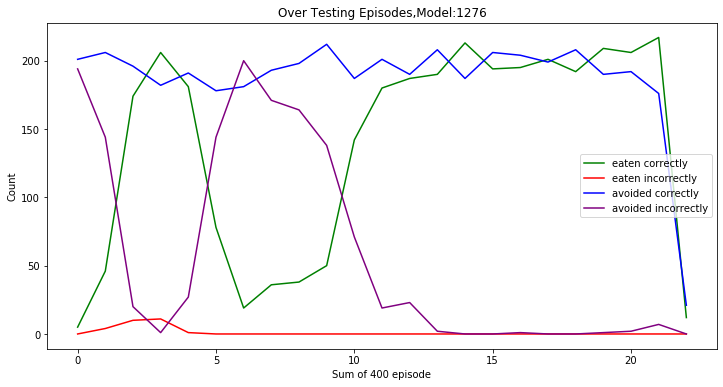

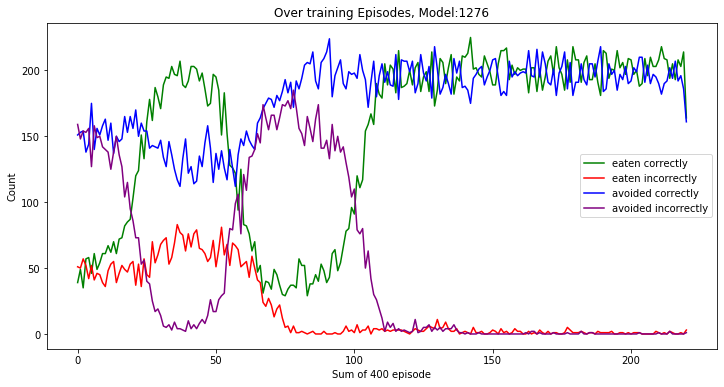

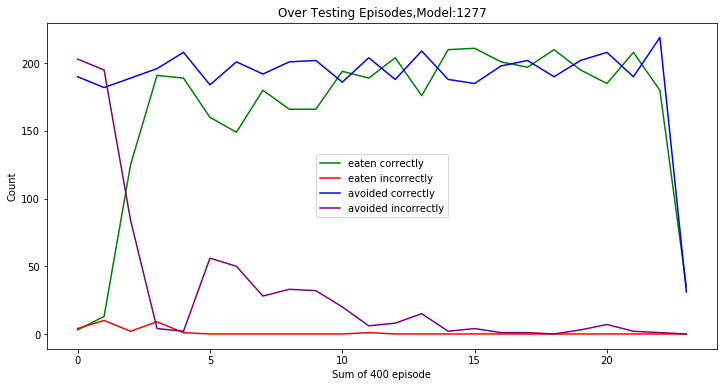

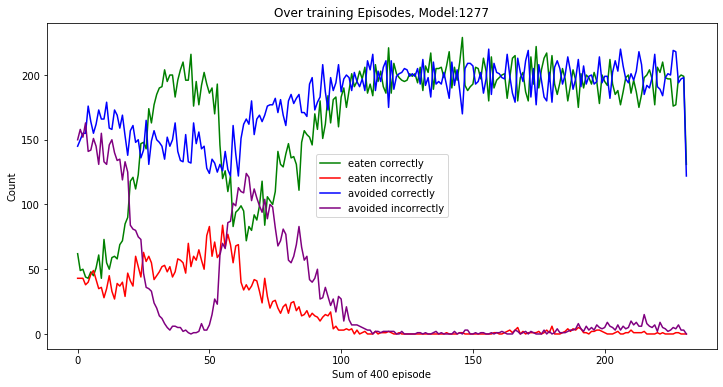

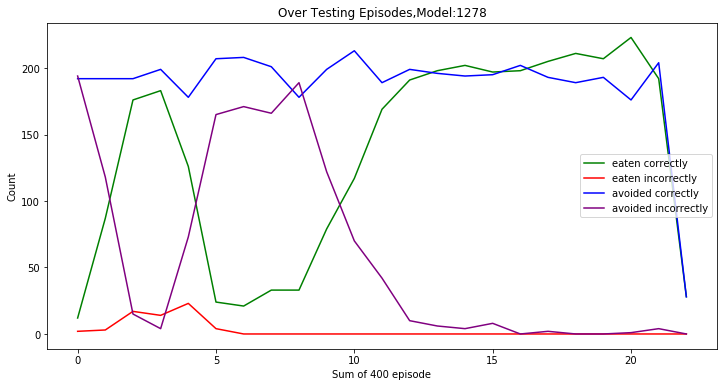

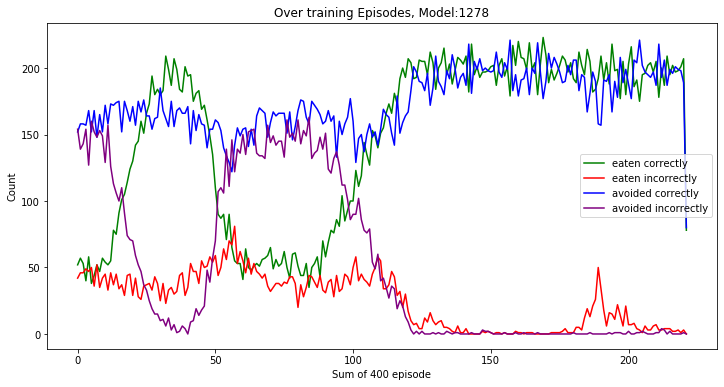

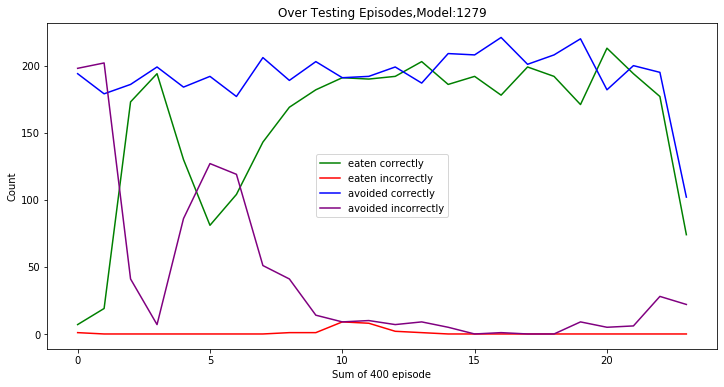

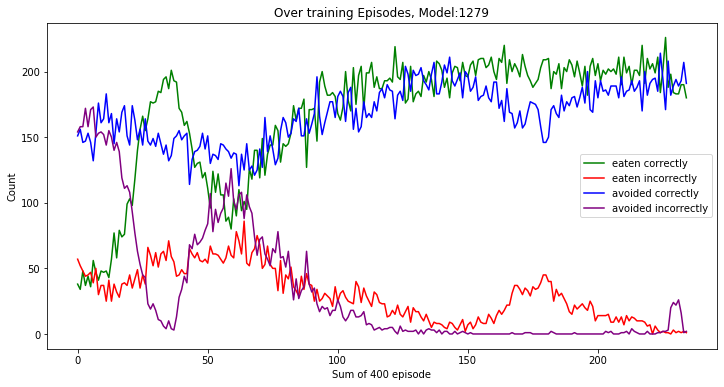

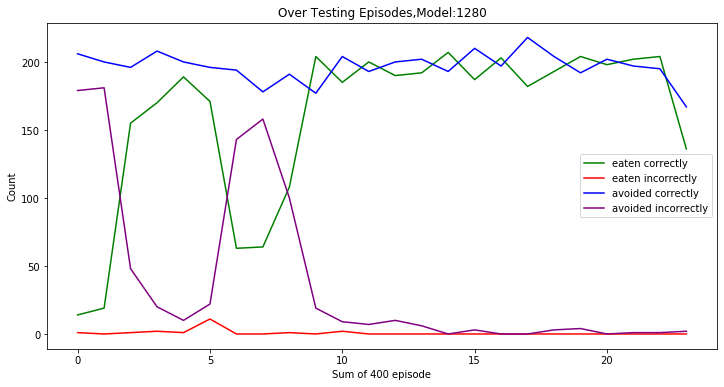

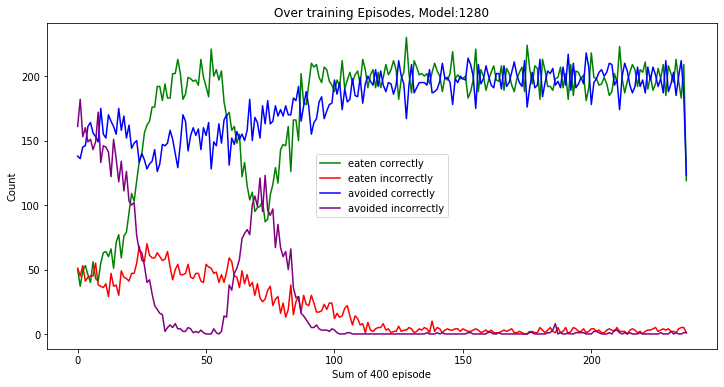

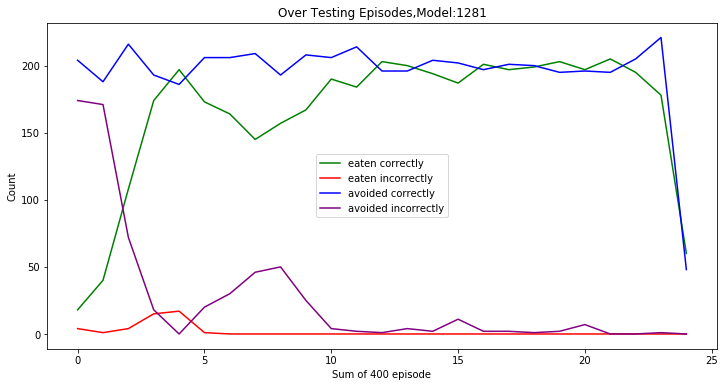

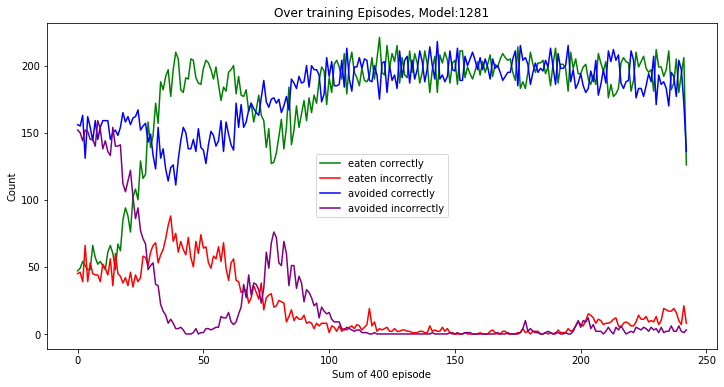

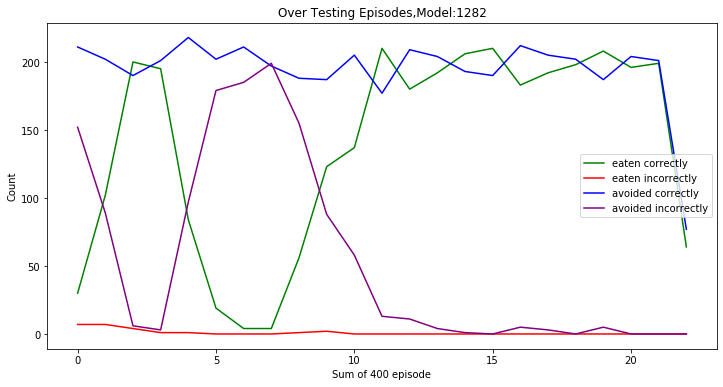

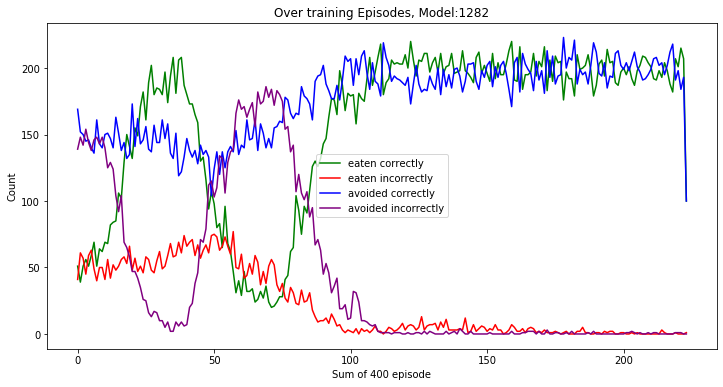

In [3]:
for i in range(1276,1283):
    x = pd.read_csv('output/{}/exp_details.csv'.format(i),header=None)
    plotdata(x,400,i)

### Allo, L2

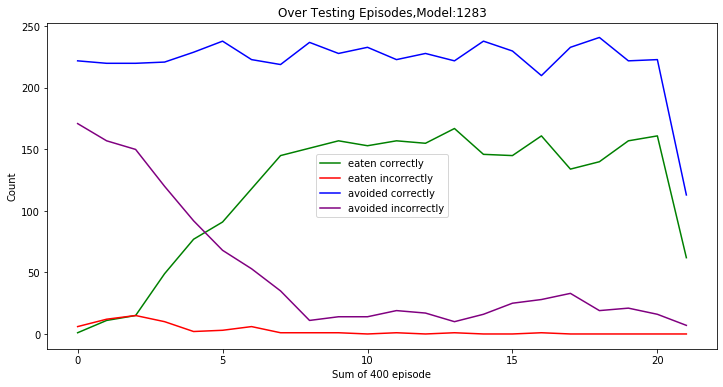

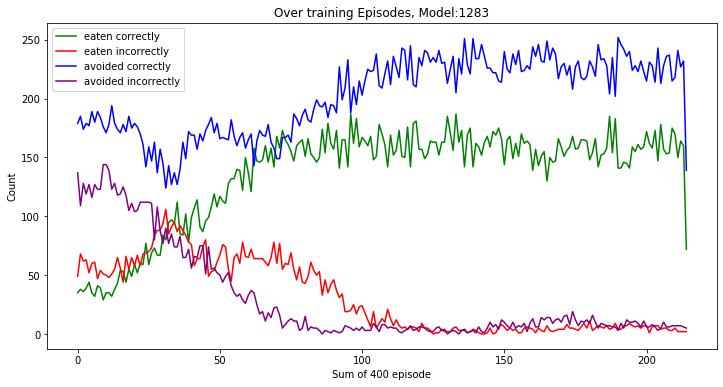

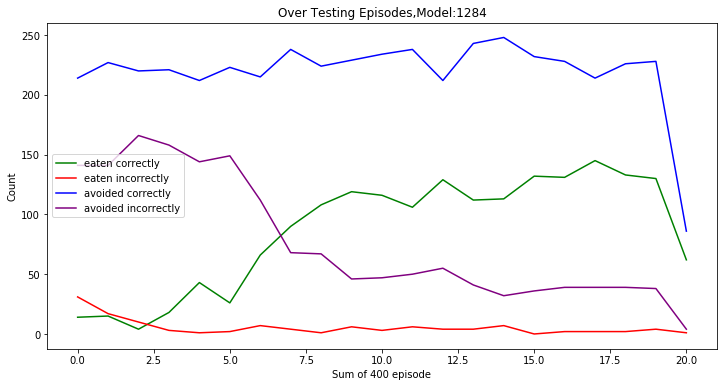

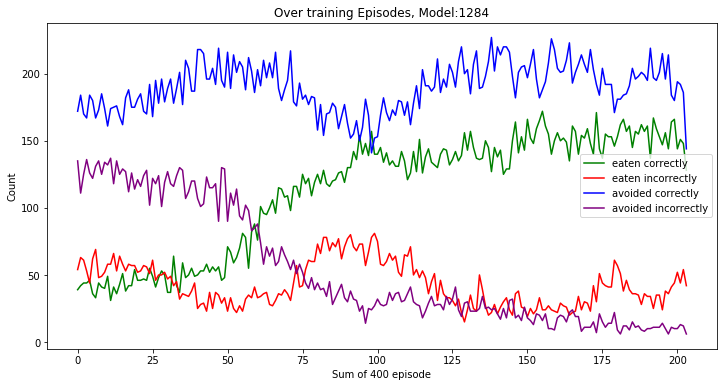

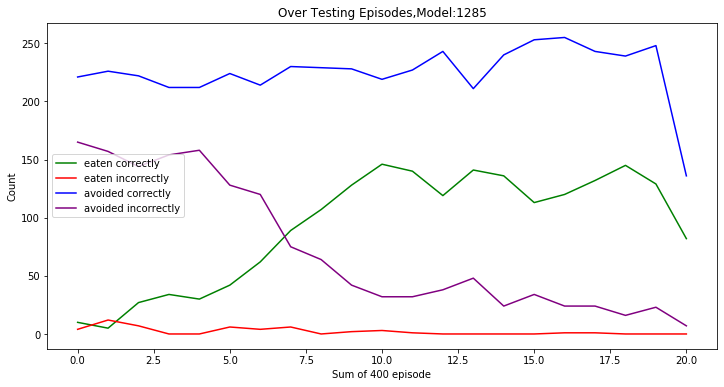

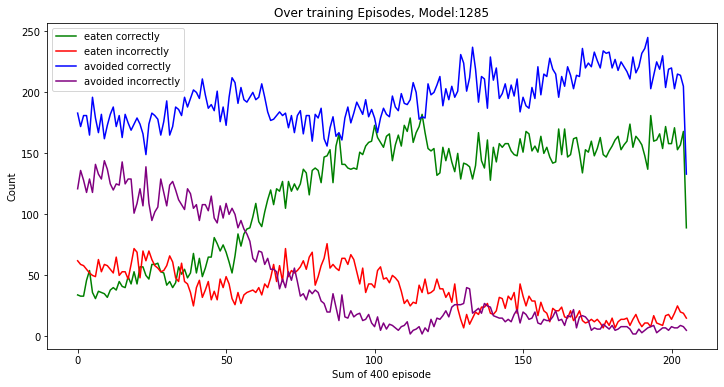

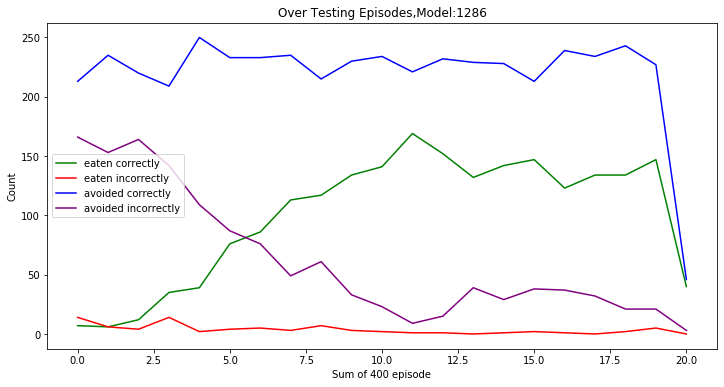

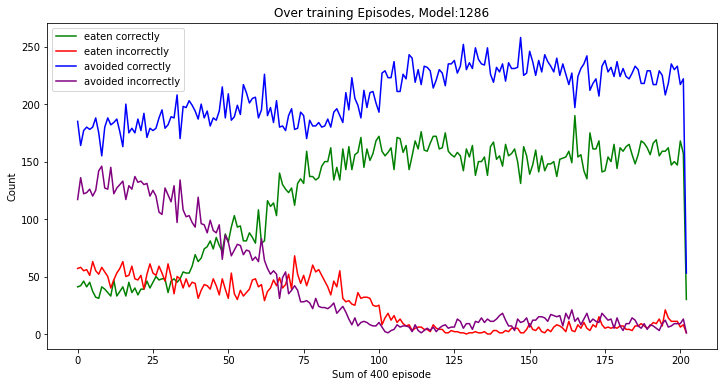

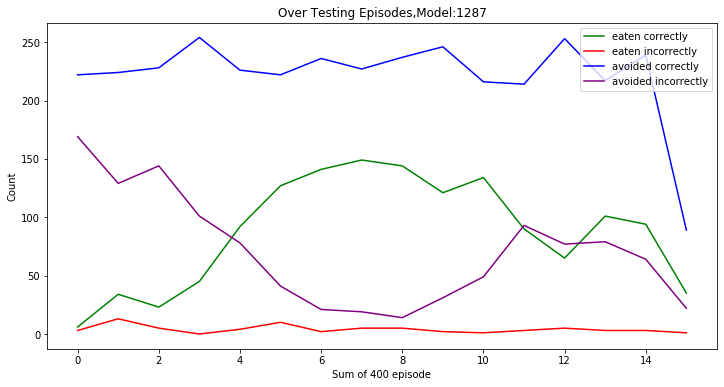

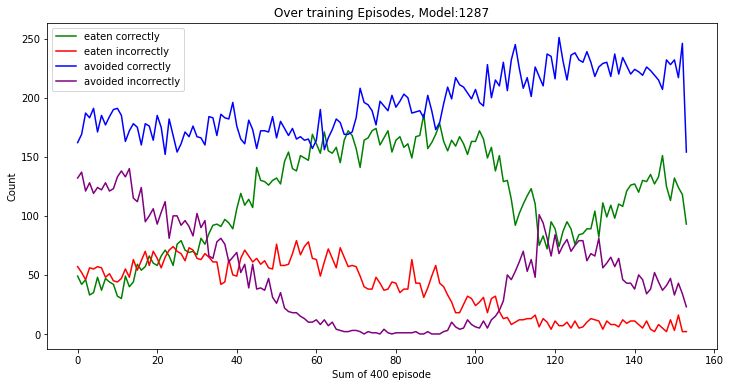

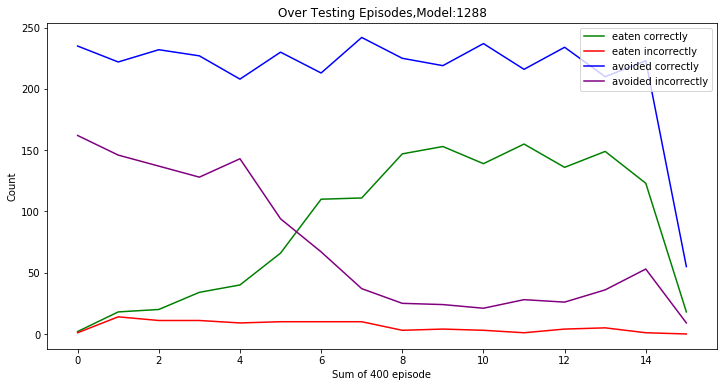

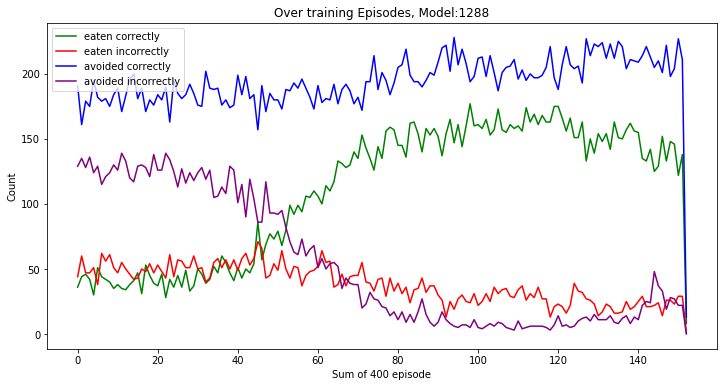

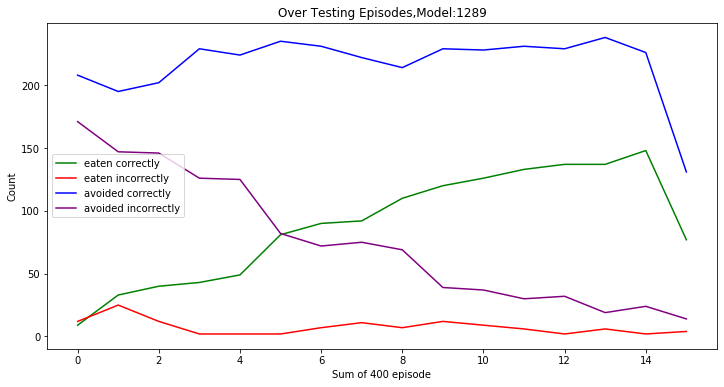

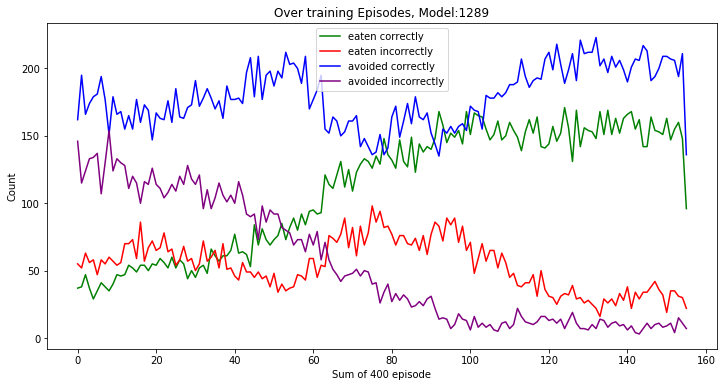

In [4]:
for i in range(1283,1290):
    x = pd.read_csv('output/{}/exp_details.csv'.format(i),header=None)
    plotdata(x,400,i)

### Allo, L3

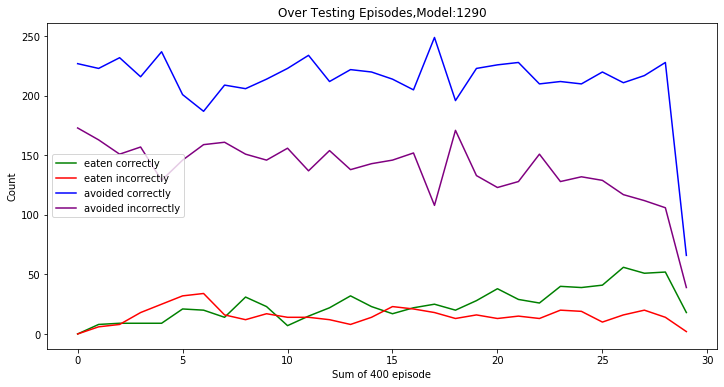

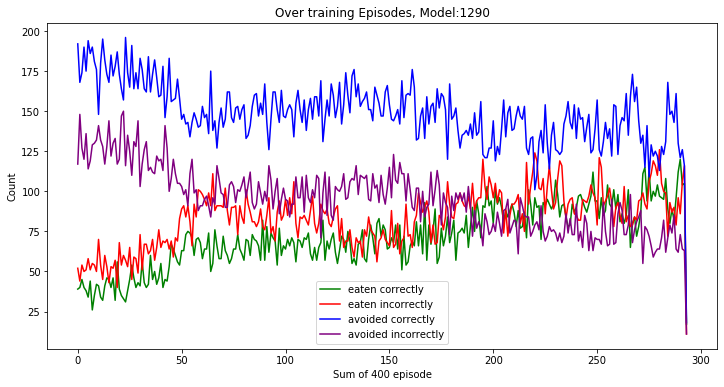

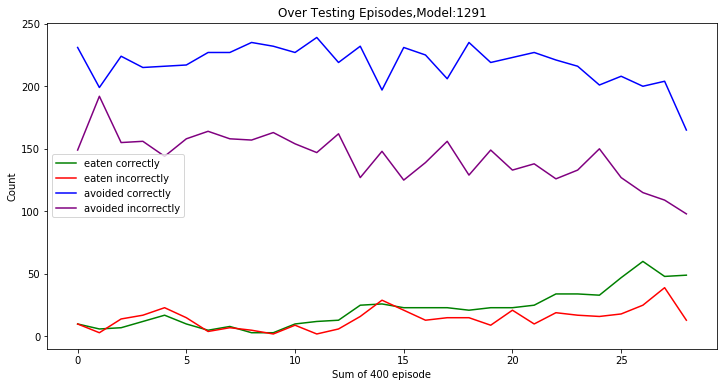

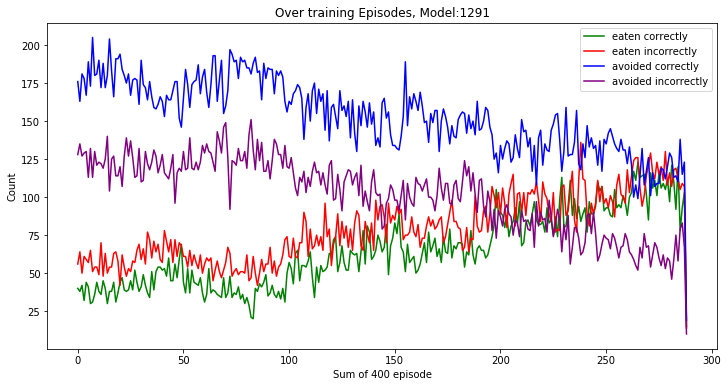

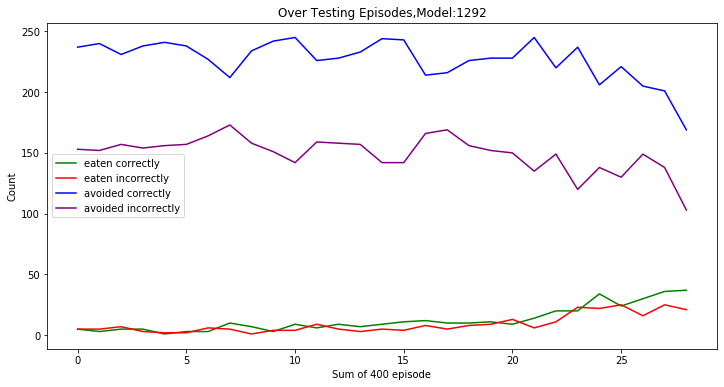

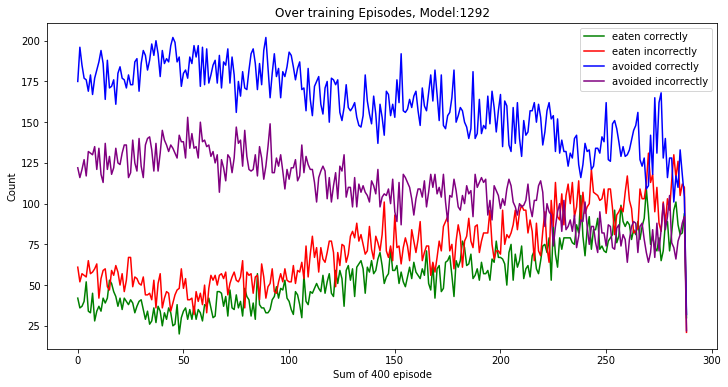

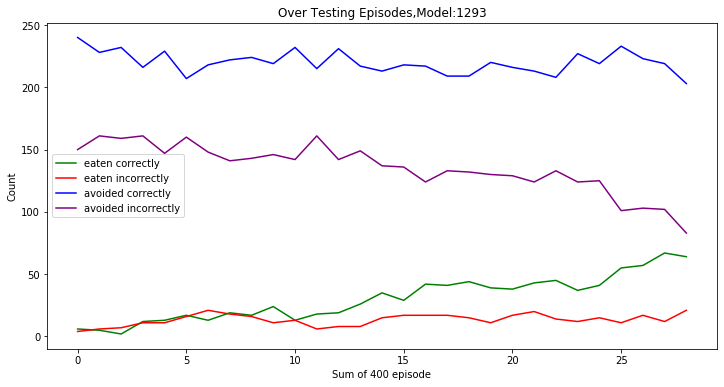

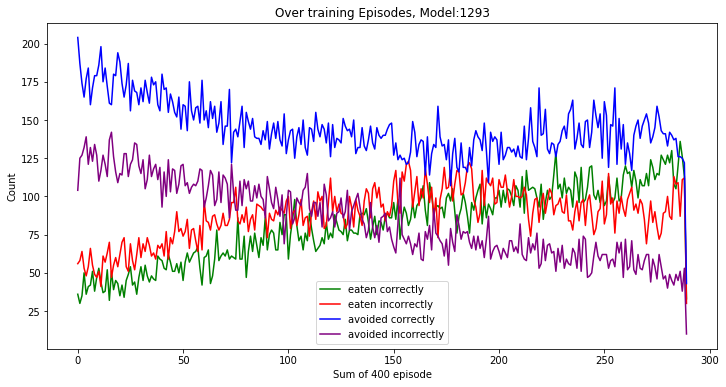

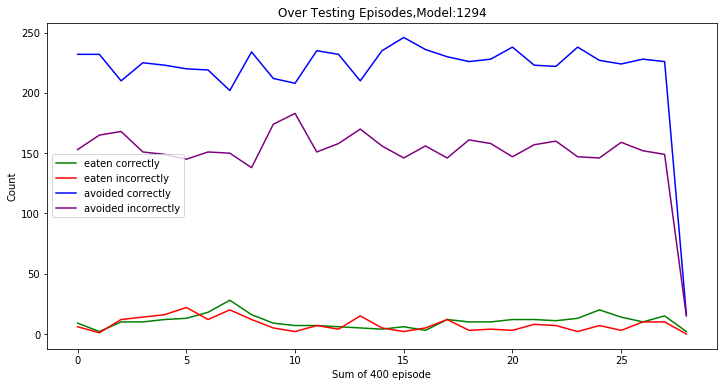

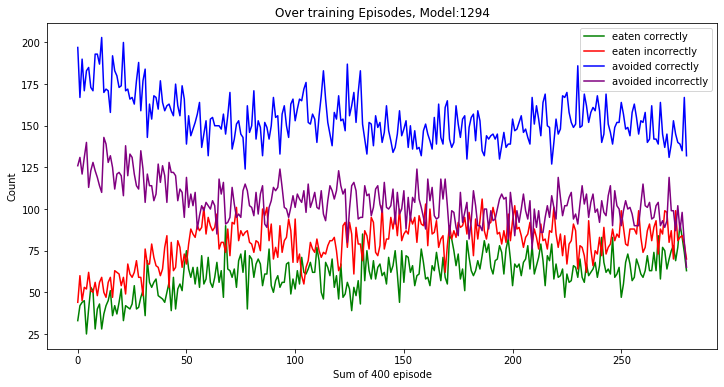

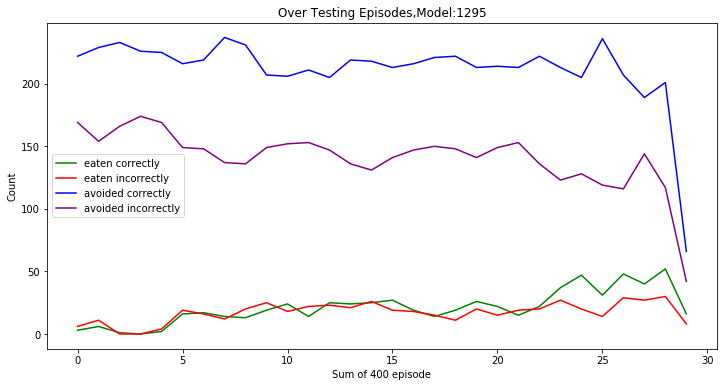

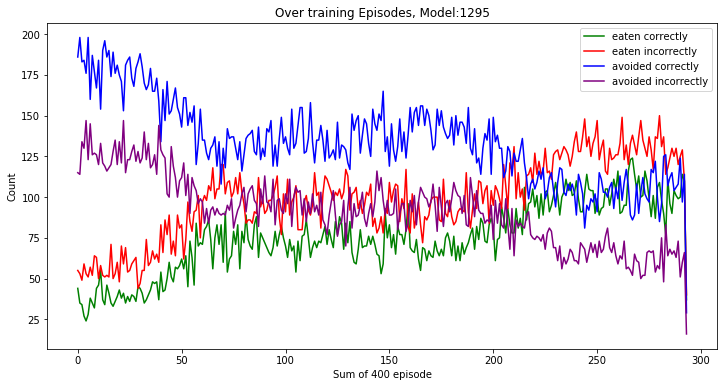

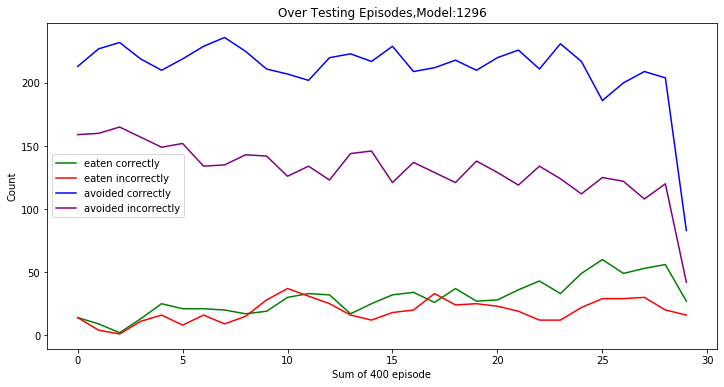

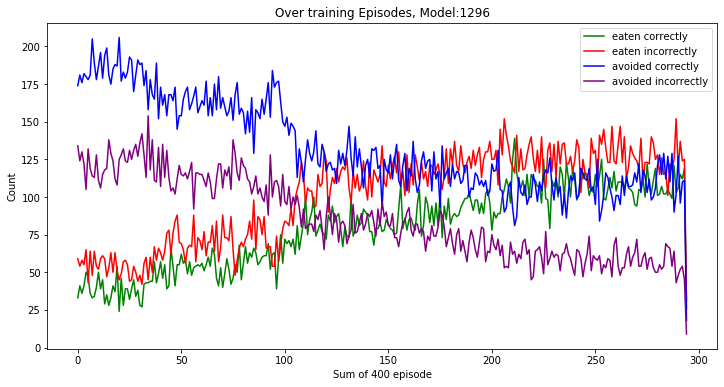

In [5]:
for i in range(1290,1297):
    x = pd.read_csv('output/{}/exp_details.csv'.format(i),header=None)
    j = x[x[5]=='train']
    j = j[0]
    j = j[j.duplicated()].index[0]
    x = x[j:]
    plotdata(x,400,i)

### Ego, L1

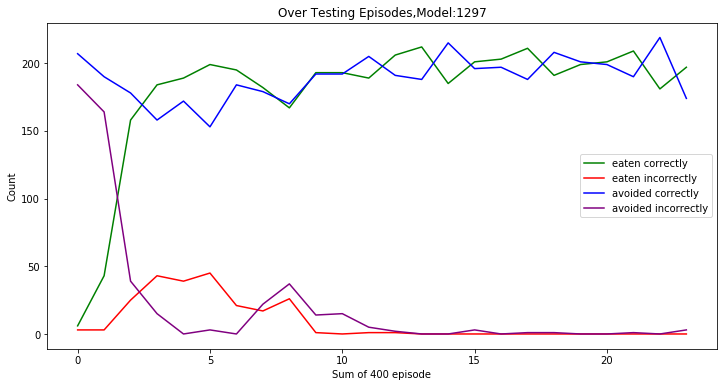

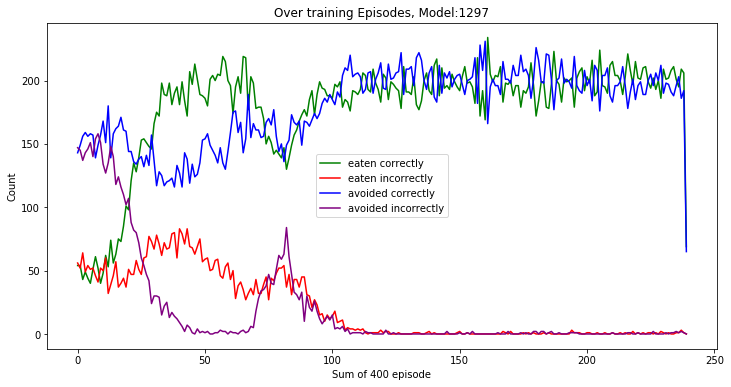

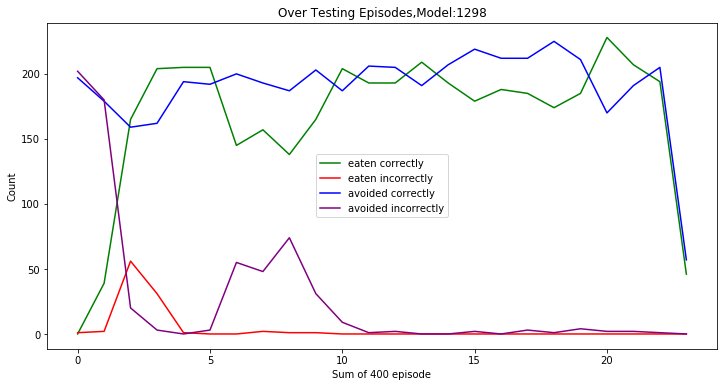

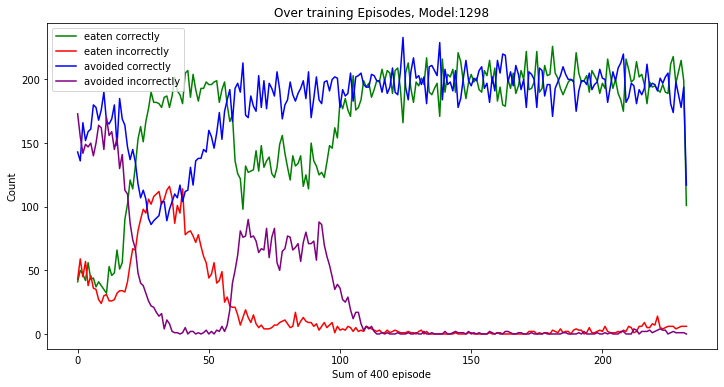

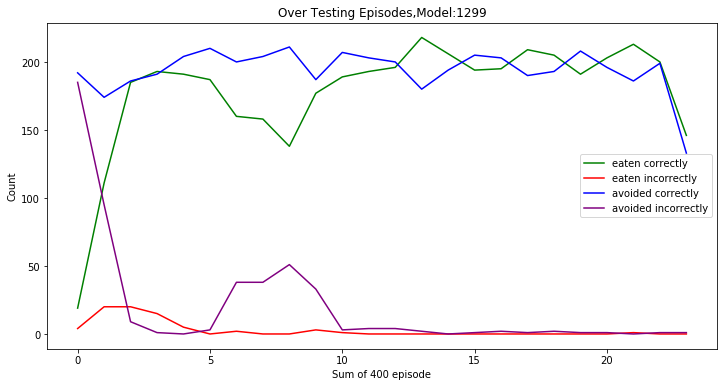

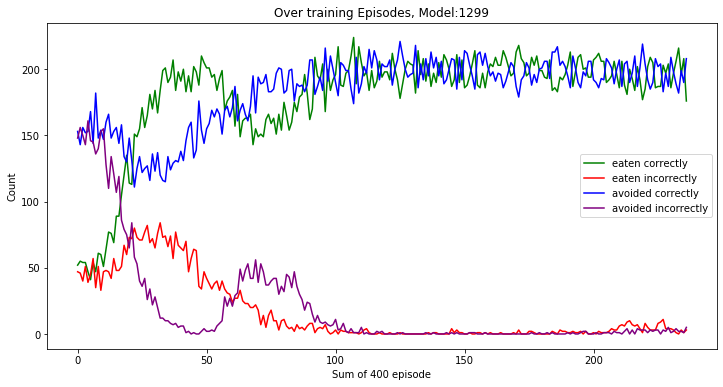

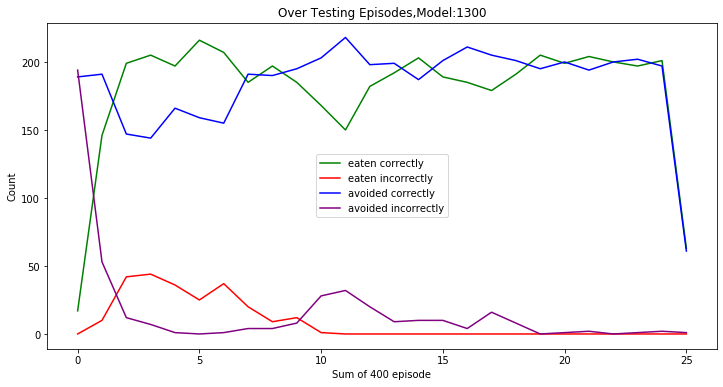

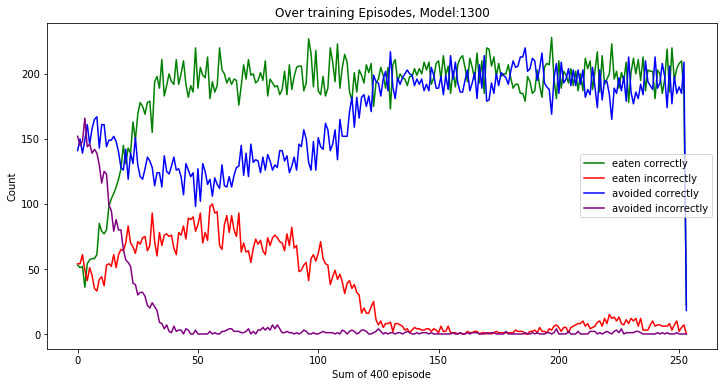

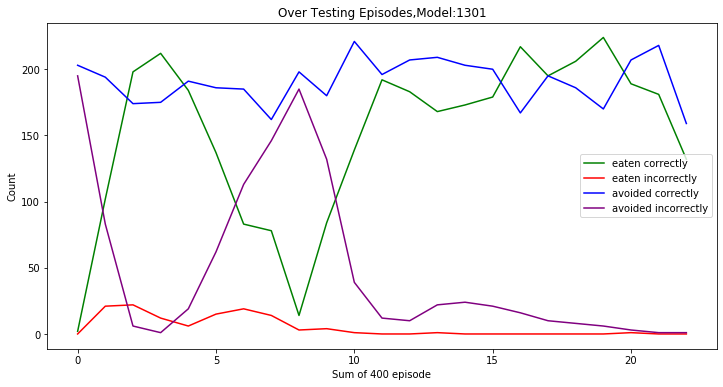

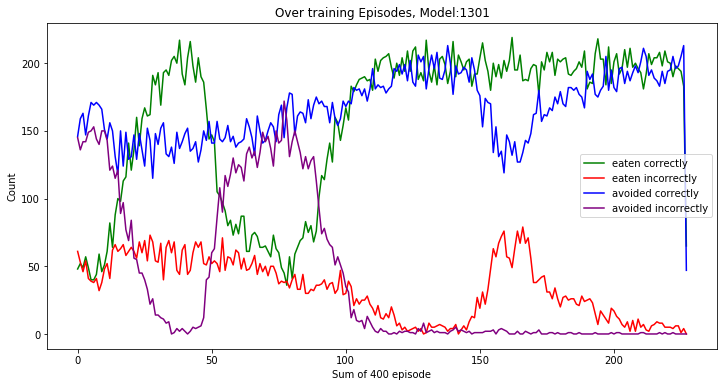

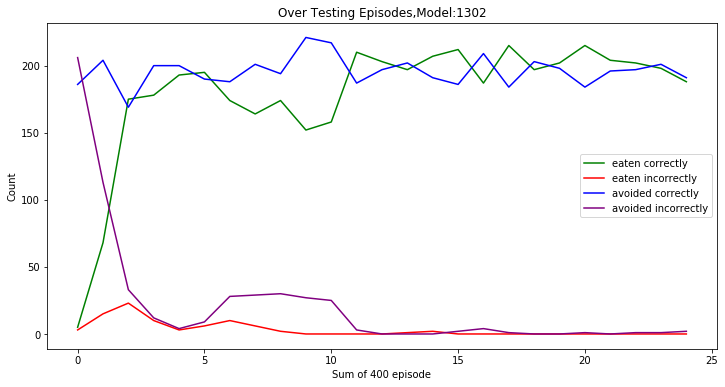

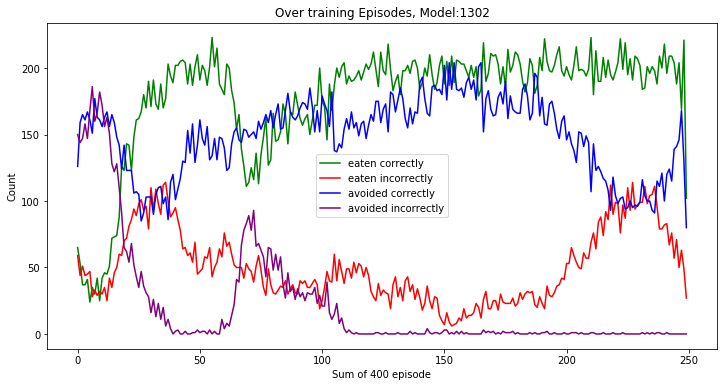

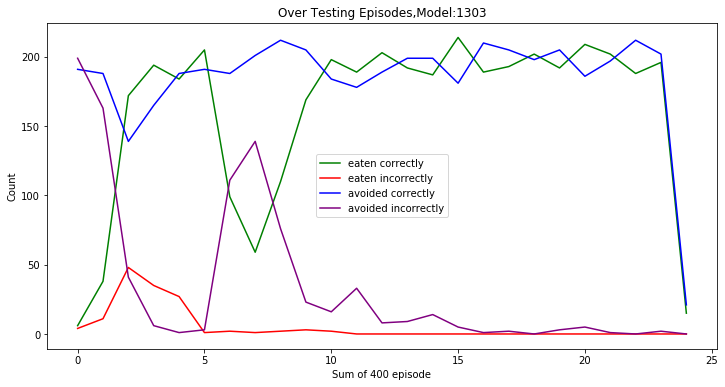

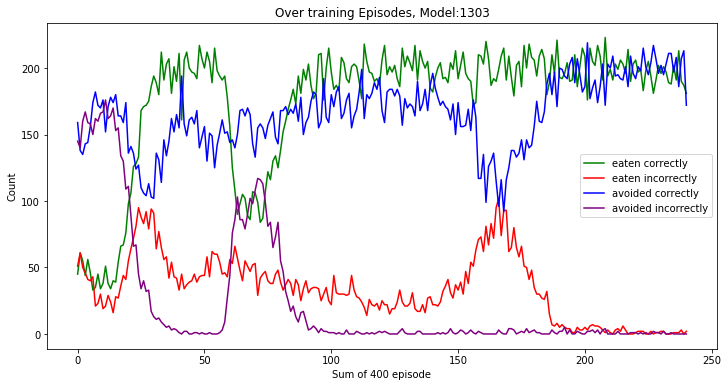

In [6]:
for i in range(1297,1304):
    x = pd.read_csv('output/{}/exp_details.csv'.format(i),header=None)
    plotdata(x,400,i)

### Ego, L2

<Figure size 936x360 with 0 Axes>

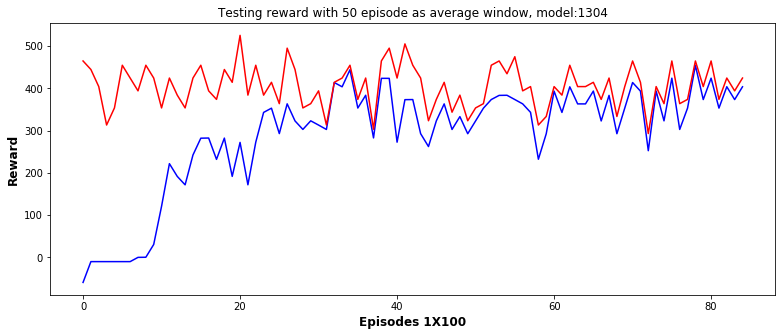

<Figure size 936x360 with 0 Axes>

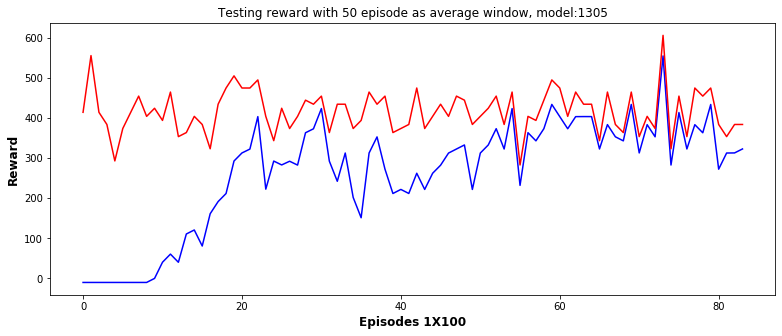

<Figure size 936x360 with 0 Axes>

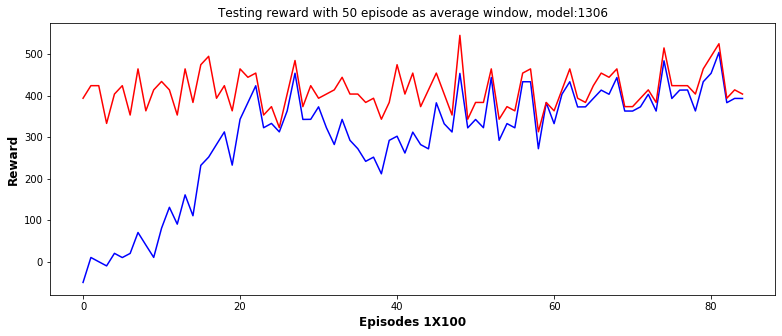

<Figure size 936x360 with 0 Axes>

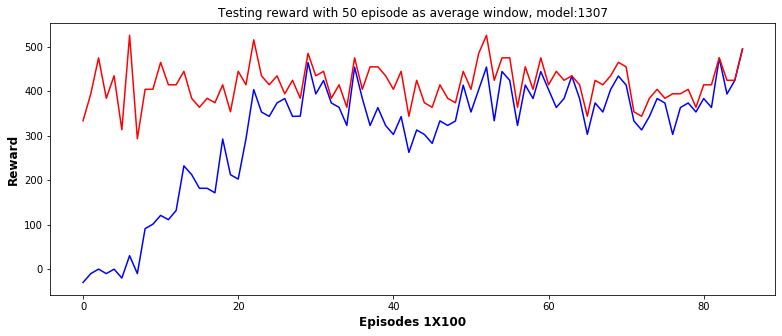

<Figure size 936x360 with 0 Axes>

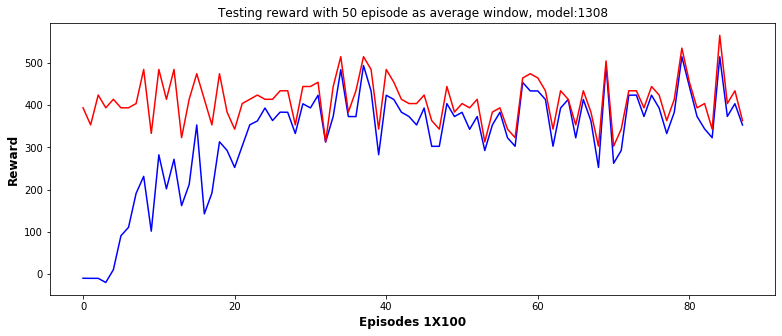

<Figure size 936x360 with 0 Axes>

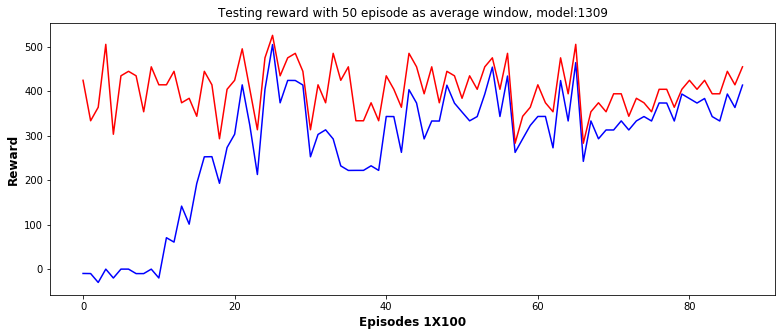

<Figure size 936x360 with 0 Axes>

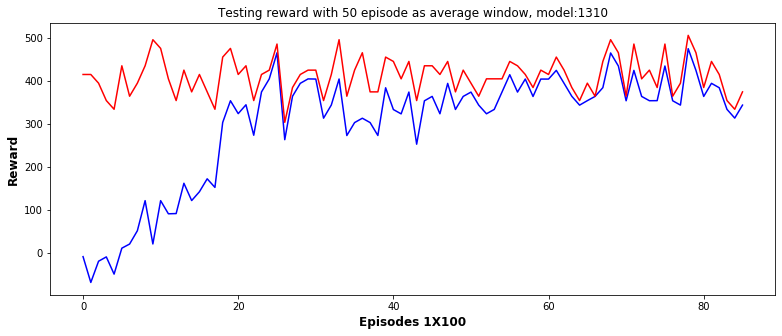

In [3]:
for i in range(1304,1311):
    ax = plot_experiment(i,titl='Testing reward with {} episode as average window',
                xlbl='Episodes 1X{}',ylbl='Reward',window=100,typ='Test')
    plt.title('Testing reward with {} episode as average window, model:{}'.format(50,i))

In [ ]:
for i in range(1304,1311):
    x = pd.read_csv('output/{}/exp_details.csv'.format(i),header=None)
    plotdata(x,400,i)

### Ego, L3

findfont: Font family ['helvetica-light-587ebe5a59211'] not found. Falling back to DejaVu Sans.
findfont: Font family ['helvetica-light-587ebe5a59211'] not found. Falling back to DejaVu Sans.


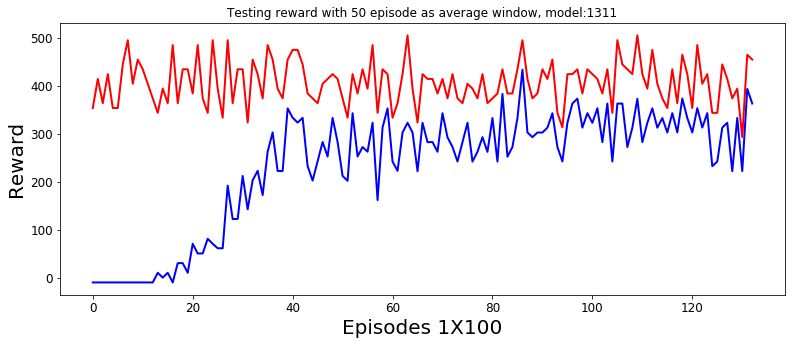

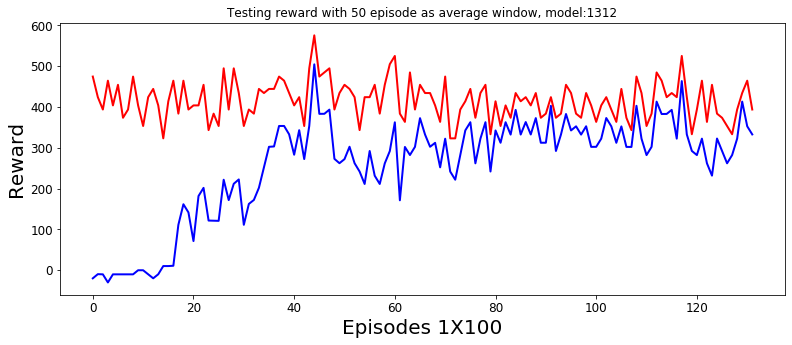

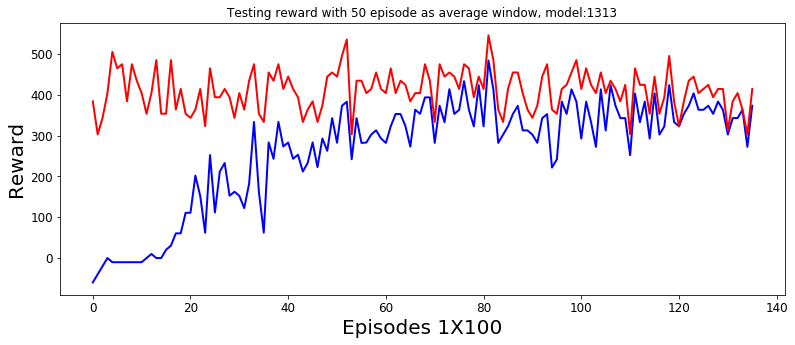

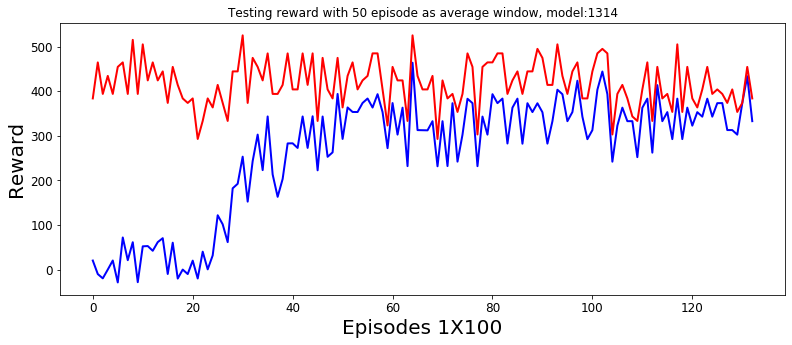

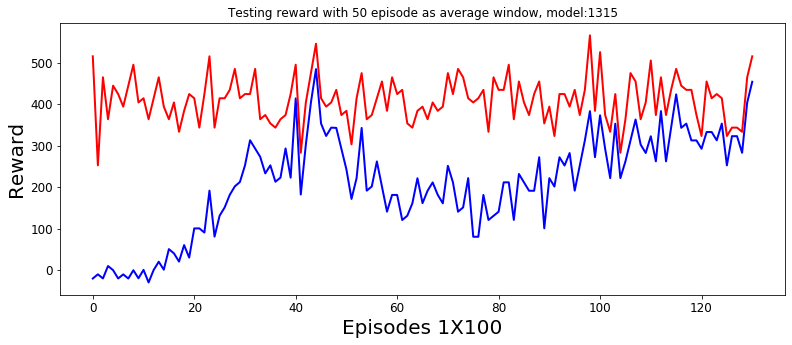

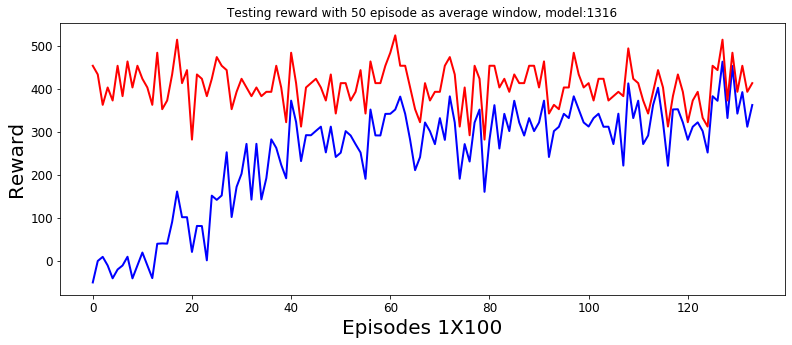

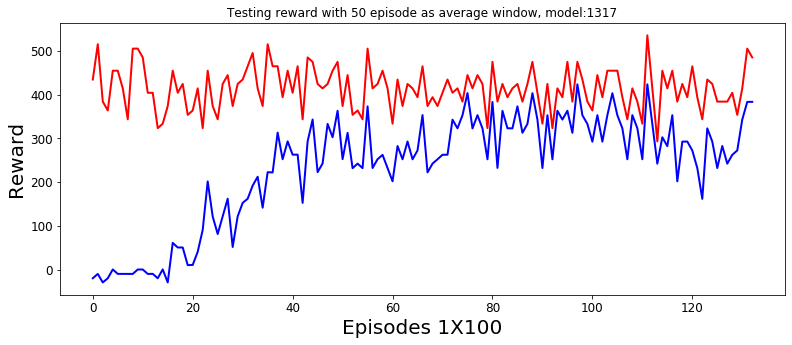

In [5]:
for i in range(1311,1318):
    plot_experiment(i,titl='Testing reward with {} episode as average window',
                xlbl='Episodes 1X{}',ylbl='Reward',window=100,typ='Test')
    plt.title('Testing reward with {} episode as average window, model:{}'.format(50,i))

In [ ]:
#t=0
#plt.figure(figsize=(26,21))
y_info ={1230:True,1246:False,1166:True,1252:False,1181:True,1265:False}
x_info ={1230:False,1246:False,1166:False,1252:False,1181:True,1265:True}
y_size ={1230:(13,5),1246:(12.1,5),1166:(13,5),1252:(12,5),1181:(13,5),1265:(12,5)}
texts={1230:'a)',1246:'b)',1166:'c)',1252:'d)',1181:'e)',1265:'f)'}
for i in [1230,1246,1166,1252,1181,1265]:
 #   t+=1
 #   ax = plt.subplot(3,2,t)
    ax = plot_experiment_7seeds(i,titl='',
                xlbl='Episodes 1X{}',ylbl='Reward',window=100,typ='Test',fs=y_size[i])
    ax.set_ylim(-100,650)
    if not y_info[i]:
        ax.set_ylabel('')
        ax.set_yticklabels([])
        
    if not x_info[i]:
        ax.set_xlabel('')

    plt.tight_layout()

    plt.savefig('{}_std.png'.format(i),dpi=300)

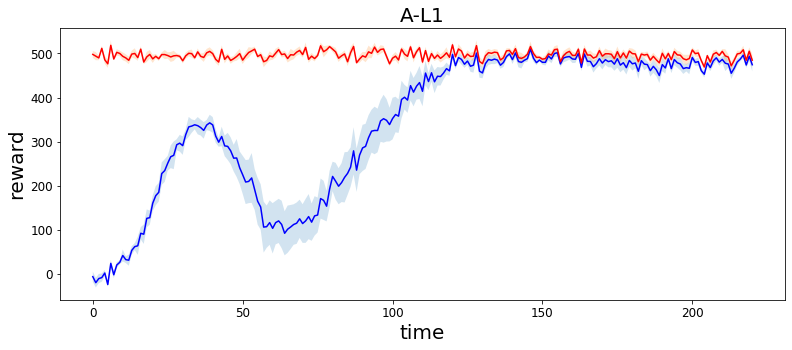

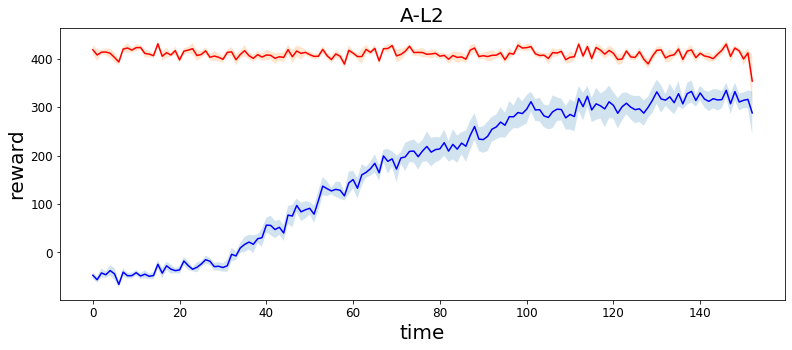

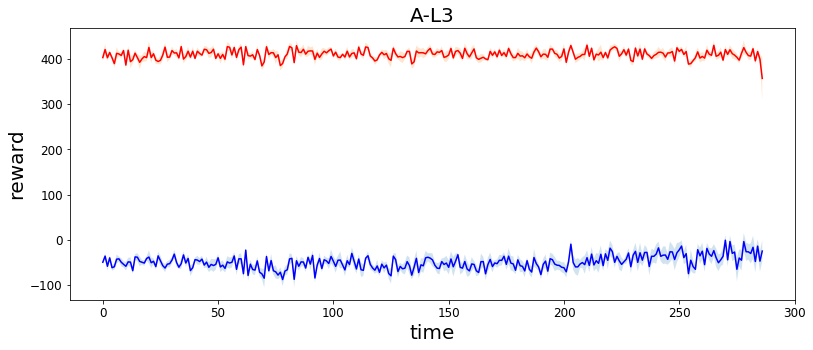

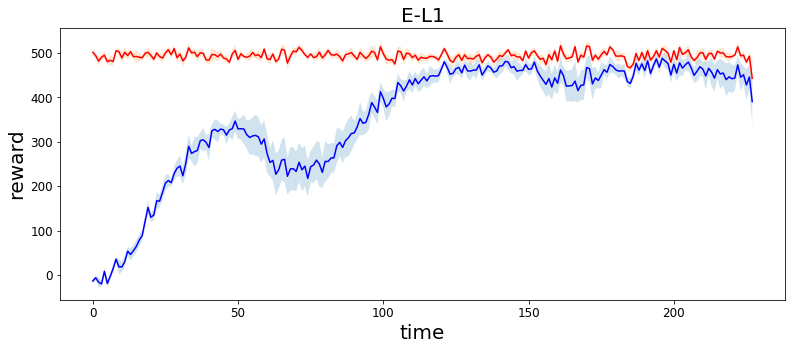

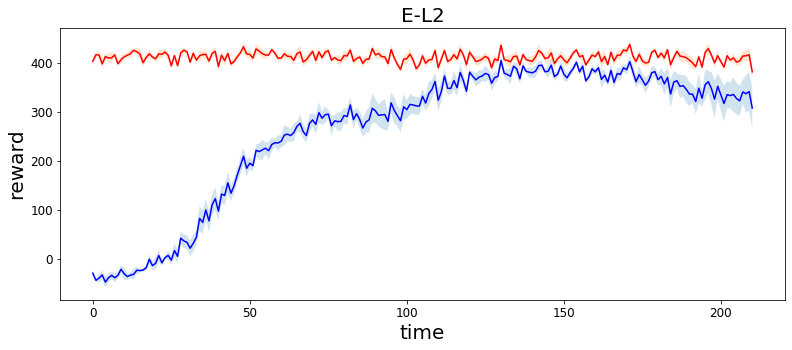

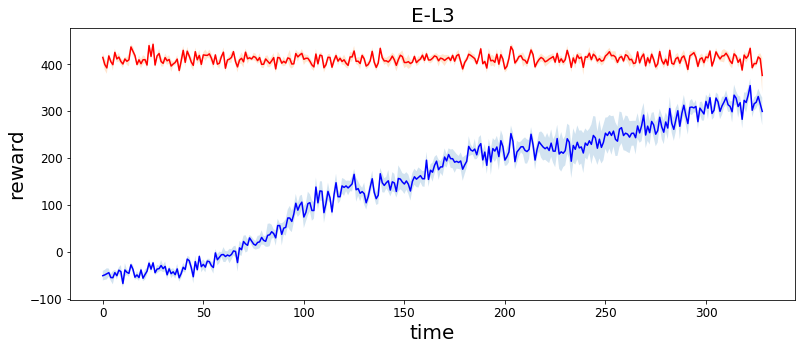

In [9]:
important_exp = {1276:[1276,1282,'A-L1'],1283:[1283,1289,'A-L2'],1290:[1290,1296,'A-L3'],
                 1297:[1297,1303,'E-L1'],1304:[1304,1310,'E-L2'],1311:[1311,1317,'E-L3']}
for i in important_exp.keys():
    plot_experiment_7seeds(i,important_exp[i][2].format(i),'time','reward')

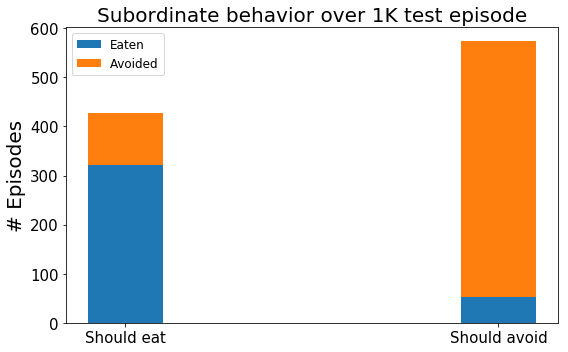

In [6]:
N = 2
menMeans = (321, 53)
womenMeans = (106,520)
ind = np.arange(N)    # the x locations for the groups
width = 0.2      # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)
p1 = ax.bar(ind, menMeans, width)
p2 = ax.bar(ind, womenMeans, width,bottom=menMeans)
ax.set_ylabel('# Episodes',fontsize=20,**hfont)
ax.set_title('Subordinate behavior over 1K test episode',fontsize=20,**csfont)
plt.setp(ax, xticks=ind, xticklabels=('Should eat', 'Should avoid'))
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
#plt.yticks(np.arange(0, 81, 10))
ax.legend((p1[0], p2[0]), ('Eaten', 'Avoided'),prop=legend_font)
plt.tight_layout()
#plt.savefig('barplot.png')
plt.show()

(75.17564402810305, 90.75043630017451) (24.824355971896956, 9.24956369982548)


/home/aqeel/miniconda3/envs/Py3_ICNS/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['helvetica-light-587ebe5a59211'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


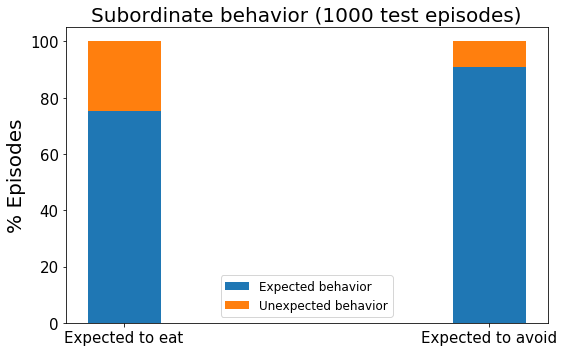

In [4]:
N = 2
totale = 321+106
totala=53+520
seat = (100*321/totale,520*100/totala )

savoid = (106*100/totale,100*53/totala)
print(seat,savoid)

ind = np.arange(N)    # the x locations for the groups
width = 0.2      # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)
p1 = ax.bar(ind, seat, width)
p2 = ax.bar(ind, savoid, width,bottom=seat)
ax.set_ylabel('% Episodes',fontsize=20,**hfont)

ax.set_title('Subordinate behavior (1000 test episodes)',fontsize=20,**csfont)
plt.setp(ax, xticks=ind, xticklabels=('Expected to eat', 'Expected to avoid'))
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
#plt.yticks(np.arange(0, 81, 10))
ax.legend((p1[0], p2[0]), ('Expected behavior', 'Unexpected behavior'),prop=legend_font)
plt.tight_layout()
plt.savefig('barplot.png')
plt.show()

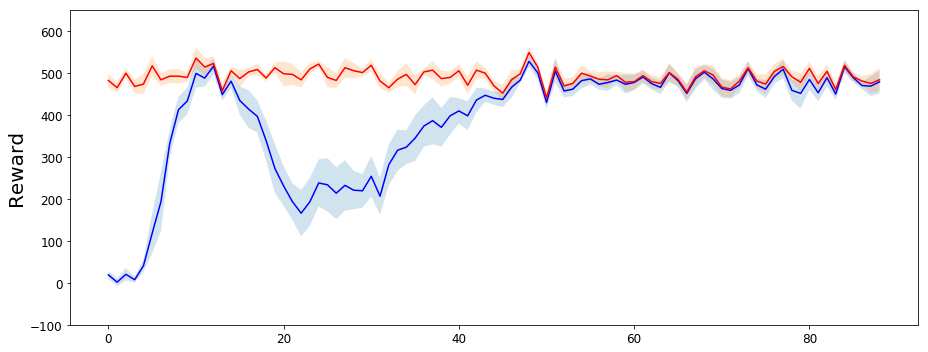

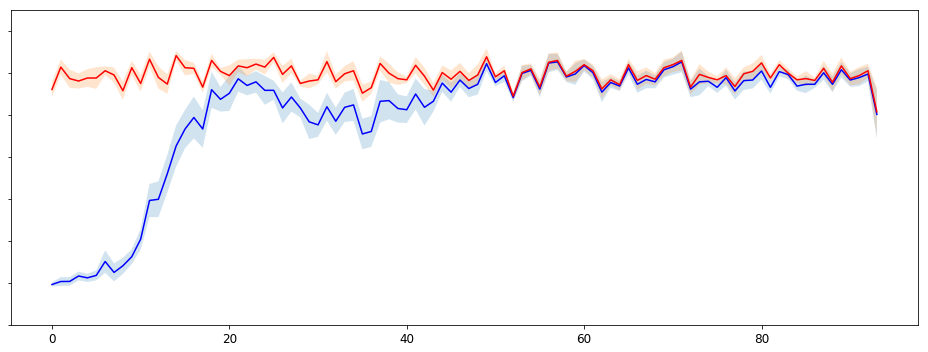

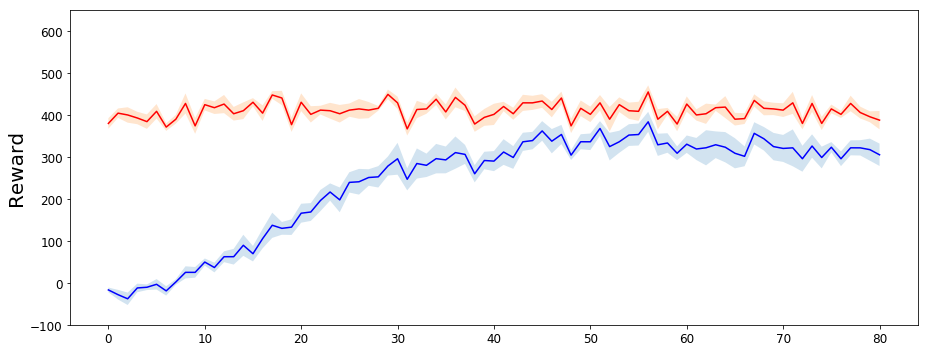

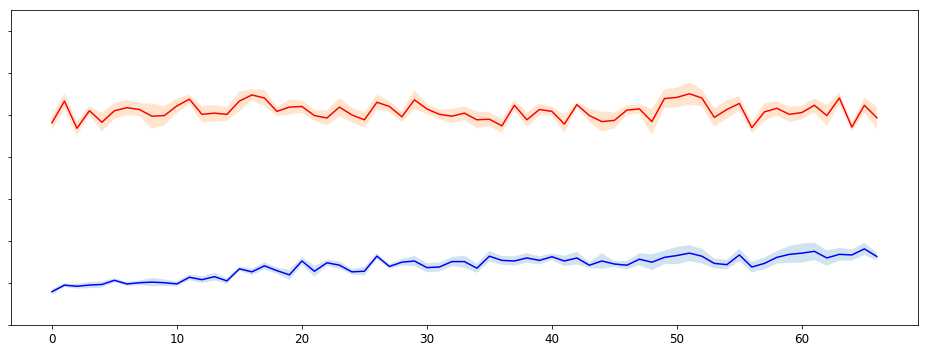

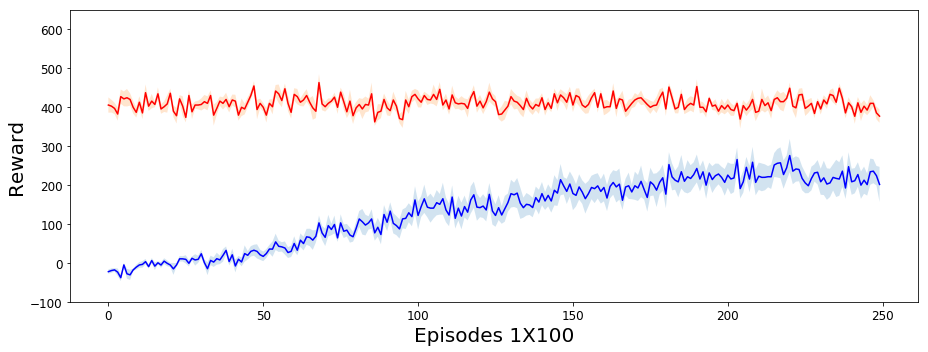

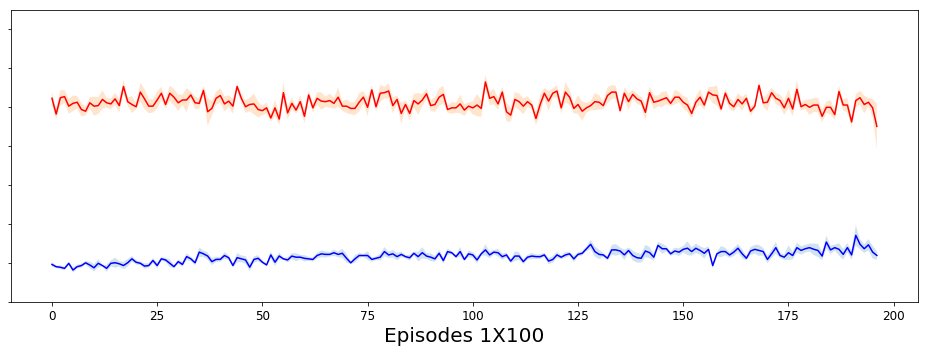

In [9]:
#t=0
#plt.figure(figsize=(26,21))
y_info ={1230:True,1246:False,1166:True,1252:False,1181:True,1265:False}
x_info ={1230:False,1246:False,1166:False,1252:False,1181:True,1265:True}
y_size ={1230:(13,5),1246:(12.1,5),1166:(13,5),1252:(12,5),1181:(13,5),1265:(12,5)}
texts={1230:'a)',1246:'b)',1166:'c)',1252:'d)',1181:'e)',1265:'f)'}
for i in [1230,1246,1166,1252,1181,1265]:
 #   t+=1
 #   ax = plt.subplot(3,2,t)
    ax = plot_experiment_7seeds(i,titl='',
                xlbl='Episodes 1X{}',ylbl='Reward',window=100,typ='Test',fs=y_size[i])
    ax.set_ylim(-100,650)
    if not y_info[i]:
        ax.set_ylabel('')
        ax.set_yticklabels([])
        
    if not x_info[i]:
        ax.set_xlabel('')

    plt.tight_layout()

    plt.savefig('{}_std.png'.format(i),dpi=300)